# Import Data

In [1]:
# clear memory
%reset -f

# helper.py
from helper import *

In [2]:
# load data
df = pd.read_csv('./data/clean/fantasy_data.csv')

# ensure values are sorted properly
df = df.sort_values(by=['Key', 'Exp']).reset_index(drop=True)

# drop non-normalized columns
df = df.drop(columns=['G', 'GS', 'ProBowl', 'AllPro', 'Pass_Cmp', 'Pass_Att', 'Pass_Yds', 'Pass_TD', 'Pass_Int', 'Rush_Att', 'Rush_Yds', 'Rush_TD', 'Pass_Cmp%', 'Rec_Catch%',
                      'num_games', 'Touches', 'Rec_Tgt', 'Rec_Rec', 'Rec_Yds', 'Rec_TD', 'Fmb', 'FmbLost', 'Scrim_TD', 'Scrim_Yds', 'Rush_Y/A', 'Rec_Y/R', 'Pass_Y/A', 
                      'Points_half-ppr', 'PointsOvrRank_half-ppr', 'PointsPosRank_half-ppr', 'Points_VORP_half-ppr', 'PointsTarget_half-ppr', 'PPG_VORP_half-ppr'])

# show shape and nulls
show_shape_and_nulls(df)

Shape: (29369, 33)
Null values:


,Player,Tm,Pos,Age,Key,Year,games_played_pct,games_started_pct,Exp,Pass_Cmp_per_game,Pass_Att_per_game,Pass_Yds_per_game,Pass_TD_per_game,Pass_Int_per_game,Rush_Att_per_game,Rush_Yds_per_game,Rush_TD_per_game,Rec_Tgt_per_game,Rec_Rec_per_game,Rec_Yds_per_game,Rec_TD_per_game,Fmb_per_game,FmbLost_per_game,Scrim_TD_per_game,Scrim_Yds_per_game,Touches_per_game,PPG_half-ppr,PPT_half-ppr,PPGOvrRank_half-ppr,PPGPosRank_half-ppr,PPTOvrRank_half-ppr,PPTPosRank_half-ppr,PPGTarget_half-ppr
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6959


- We will be using normalized features (per-game stats and other percentages) along with __PPG half-ppr fantasy points__ as the target. 
- This will not punish players for missing games or getting injured (which is unfortunate but very common in the NFL).
- A [seperate model]() will be trained to determine injury probability based on past volume and games missed.
- The only null values are held in the "Target" column (indicating players in their final season). We cannot use rows without a target to train, so they will be dropped here.

In [3]:
# get 2024 data
df_2024 = df[df['Year'] == 2024].copy()

# drop players with null target values
df = df.dropna(subset='PPGTarget_half-ppr')

# check
df.isna().sum().sum()

0

# Create Features

In [ ]:
# aggregate data by player
features = create_features(df)

# check
features.sample()

,Age,AllPro,AllPro_3y_mean,AllPro_3y_std,AllPro_career_mean,AllPro_career_std,AllPro_career_trend_slope,AllPro_momentum,Exp,Fmb,FmbLost,FmbLost_3y_mean,FmbLost_3y_std,FmbLost_career_mean,FmbLost_career_std,FmbLost_career_trend_slope,FmbLost_momentum,FmbLost_per_game,FmbLost_per_game_3y_mean,FmbLost_per_game_3y_std,FmbLost_per_game_career_mean,FmbLost_per_game_career_std,FmbLost_per_game_career_trend_slope,FmbLost_per_game_momentum,Fmb_3y_mean,Fmb_3y_std,Fmb_career_mean,Fmb_career_std,Fmb_career_trend_slope,Fmb_momentum,Fmb_per_game,Fmb_per_game_3y_mean,Fmb_per_game_3y_std,Fmb_per_game_career_mean,Fmb_per_game_career_std,Fmb_per_game_career_trend_slope,Fmb_per_game_momentum,G,GS,GS_3y_mean,GS_3y_std,GS_career_mean,GS_career_std,GS_career_trend_slope,GS_momentum,G_3y_mean,G_3y_std,G_career_mean,G_career_std,G_career_trend_slope,G_momentum,Key,PPGOvrRank_half-ppr,PPGOvrRank_half-ppr_3y_mean,PPGOvrRank_half-ppr_3y_std,PPGOvrRank_half-ppr_career_mean,PPGOvrRank_half-ppr_career_std,PPGOvrRank_half-ppr_career_trend_slope,PPGOvrRank_half-ppr_momentum,PPGPosRank_half-ppr,PPGPosRank_half-ppr_3y_mean,PPGPosRank_half-ppr_3y_std,PPGPosRank_half-ppr_career_mean,PPGPosRank_half-ppr_career_std,PPGPosRank_half-ppr_career_trend_slope,PPGPosRank_half-ppr_momentum,PPGTarget_half-ppr,PPG_VORP_half-ppr,PPG_VORP_half-ppr_3y_mean,PPG_VORP_half-ppr_3y_std,PPG_VORP_half-ppr_career_mean,PPG_VORP_half-ppr_career_std,PPG_VORP_half-ppr_career_trend_slope,PPG_VORP_half-ppr_momentum,PPG_half-ppr,PPG_half-ppr_3y_mean,PPG_half-ppr_3y_std,PPG_half-ppr_career_mean,PPG_half-ppr_career_std,PPG_half-ppr_career_trend_slope,PPG_half-ppr_momentum,PPTOvrRank_half-ppr,PPTOvrRank_half-ppr_3y_mean,PPTOvrRank_half-ppr_3y_std,PPTOvrRank_half-ppr_career_mean,PPTOvrRank_half-ppr_career_std,PPTOvrRank_half-ppr_career_trend_slope,PPTOvrRank_half-ppr_momentum,PPTPosRank_half-ppr,PPTPosRank_half-ppr_3y_mean,PPTPosRank_half-ppr_3y_std,PPTPosRank_half-ppr_career_mean,PPTPosRank_half-ppr_career_std,PPTPosRank_half-ppr_career_trend_slope,PPTPosRank_half-ppr_momentum,PPT_half-ppr,PPT_half-ppr_3y_mean,PPT_half-ppr_3y_std,PPT_half-ppr_career_mean,PPT_half-ppr_career_std,PPT_half-ppr_career_trend_slope,PPT_half-ppr_momentum,Pass_Att,Pass_Att_3y_mean,Pass_Att_3y_std,Pass_Att_career_mean,Pass_Att_career_std,Pass_Att_career_trend_slope,Pass_Att_momentum,Pass_Att_per_game,Pass_Att_per_game_3y_mean,Pass_Att_per_game_3y_std,Pass_Att_per_game_career_mean,Pass_Att_per_game_career_std,Pass_Att_per_game_career_trend_slope,Pass_Att_per_game_momentum,Pass_Cmp,Pass_Cmp%,Pass_Cmp%_3y_mean,Pass_Cmp%_3y_std,Pass_Cmp%_career_mean,Pass_Cmp%_career_std,Pass_Cmp%_career_trend_slope,Pass_Cmp%_momentum,Pass_Cmp_3y_mean,Pass_Cmp_3y_std,Pass_Cmp_career_mean,Pass_Cmp_career_std,Pass_Cmp_career_trend_slope,Pass_Cmp_momentum,Pass_Cmp_per_game,Pass_Cmp_per_game_3y_mean,Pass_Cmp_per_game_3y_std,Pass_Cmp_per_game_career_mean,Pass_Cmp_per_game_career_std,Pass_Cmp_per_game_career_trend_slope,Pass_Cmp_per_game_momentum,Pass_Int,Pass_Int_3y_mean,Pass_Int_3y_std,Pass_Int_career_mean,Pass_Int_career_std,Pass_Int_career_trend_slope,Pass_Int_momentum,Pass_Int_per_game,Pass_Int_per_game_3y_mean,Pass_Int_per_game_3y_std,Pass_Int_per_game_career_mean,Pass_Int_per_game_career_std,Pass_Int_per_game_career_trend_slope,Pass_Int_per_game_momentum,Pass_TD,Pass_TD_3y_mean,Pass_TD_3y_std,Pass_TD_career_mean,Pass_TD_career_std,Pass_TD_career_trend_slope,Pass_TD_momentum,Pass_TD_per_game,Pass_TD_per_game_3y_mean,Pass_TD_per_game_3y_std,Pass_TD_per_game_career_mean,Pass_TD_per_game_career_std,Pass_TD_per_game_career_trend_slope,Pass_TD_per_game_momentum,Pass_Y/A,Pass_Y/A_3y_mean,Pass_Y/A_3y_std,Pass_Y/A_career_mean,Pass_Y/A_career_std,Pass_Y/A_career_trend_slope,Pass_Y/A_momentum,Pass_Yds,Pass_Yds_3y_mean,Pass_Yds_3y_std,Pass_Yds_career_mean,Pass_Yds_career_std,Pass_Yds_career_trend_slope,Pass_Yds_momentum,Pass_Yds_per_game,Pass_Yds_per_game_3y_mean,Pass_Yds_per_game_3y_std,Pass_Yds_per_game_career_mean,Pass_Yds_per_game_career_std,Pass_Y

# Positional Subsets

In [ ]:
# get positional subsets
qb, rb, wr_te = get_pos_subsets(features)

# show shapes
qb.shape, rb.shape, wr_te.shape

((3458, 155), (7089, 148), (11863, 148))

# Baseline
- Baseline RMSE scores for the 3 positional subsets using an XGBoost with 1000 trees.

In [ ]:
# iterate through positions
for pos, data in zip(['QB', 'RB', 'WR/TE'], [qb, rb, wr_te]):
    # cross validate
    model = XGBRegressor(n_jobs=-1, random_state=SEED, n_estimators=1000)
    summary = cross_val(df=data, target_col='PPGTarget_half-ppr', estimator=model)

    # show results
    print(f'--- {pos} ---')
    display(summary)

--- QB ---


,train_rmse,val_rmse,train_r2,val_r2
mean,0.000977,4.906692,1.000000e+00,0.397516
std,0.000031,0.052899,1.403280e-09,0.018417


--- RB ---


,train_rmse,val_rmse,train_r2,val_r2
mean,0.097257,3.653410,0.999522,0.477620
std,0.059553,0.075764,0.000400,0.016142


--- WR/TE ---


,train_rmse,val_rmse,train_r2,val_r2
mean,0.097816,2.872364,0.999431,0.519472
std,0.016209,0.039252,0.000175,0.020580


- The train metrics are almost perfect, with much worse validation scores.
- We will run 100 iterations of bayesian optimization on each positional group to regularize and bring the validation scores down.

# Optimize XGBoost

In [ ]:
# get X and y for the 3 subsets
X_qb, y_qb = get_X_y(qb)
X_rb, y_rb = get_X_y(rb)
X_wr_te, y_wr_te = get_X_y(wr_te)

# define the parameter search space
param_bounds = {'max_depth': (1, 10),
    'learning_rate': (0.0001, 0.01),
    'gamma': (0, 1),
    'subsample': (0, 1.0),
    'colsample_bytree': (0, 1.0),
    'min_child_weight': (0, 10)}

# bayesian optimize
optim_qb = run_bayes_opt(X_qb, y_qb, param_bounds, SEED)
optim_rb = run_bayes_opt(X_rb, y_rb, param_bounds, SEED)
optim_wr_te = run_bayes_opt(X_wr_te, y_wr_te, param_bounds, SEED)

|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | min_ch... | subsample |
-------------------------------------------------------------------------------------------------
| 1         | -4.834    | 0.01037   | 0.5019    | 0.005008  | 2.204     | 1.421     | 0.2186    |
| 2         | -4.909    | 0.4185    | 0.2481    | 0.0009322 | 4.109     | 1.668     | 0.8786    |
| 3         | -4.56     | 0.951     | 0.03875   | 0.007021  | 6.155     | 8.98      | 0.6669    |
| 4         | -4.537    | 0.5478    | 0.7024    | 0.003926  | 7.25      | 8.249     | 0.4657    |
| 5         | -4.562    | 0.9405    | 0.8037    | 0.009835  | 2.527     | 5.211     | 0.9455    |
| 6         | -4.558    | 0.6495    | 0.8608    | 0.009711  | 2.67      | 2.431     | 0.8734    |
| 7         | -4.523    | 0.9063    | 0.7583    | 0.003534  | 5.172     | 6.105     | 0.4963    |
| 8         | -4.552    | 0.478     | 0.4356    | 0.008717  | 2.686     | 6.877     | 0.7035    |
| 9         | -4.563

In [6]:
# get best params
best_params_qb = {'colsample_bytree': 0.7851974846280668,
 'gamma': 0.5390954261707184,
 'learning_rate': 0.004915210731990692,
 'max_depth': 5,
 'min_child_weight': 6,
 'subsample': 0.42599894061698823}
best_params_rb = {'colsample_bytree': 0.8782619512683759,
 'gamma': 0.5195746339005115,
 'learning_rate': 0.004320505446638623,
 'max_depth': 5,
 'min_child_weight': 6,
 'subsample': 0.37178624642453056}
best_params_wr_te = {'colsample_bytree': 0.602228348828822,
 'gamma': 0.45867198852071484,
 'learning_rate': 0.006296184118310474,
 'max_depth': 4,
 'min_child_weight': 6,
 'subsample': 0.7934905929987193}

# define models
xgb_qb = XGBRegressor(**best_params_qb, n_estimators=1000, random_state=SEED, n_jobs=-1)
xgb_rb = XGBRegressor(**best_params_rb, n_estimators=1000, random_state=SEED, n_jobs=-1)
xgb_wr_te = XGBRegressor(**best_params_wr_te, n_estimators=1000, random_state=SEED, n_jobs=-1)

# 2024 Predictions
Here we will train on the 2006-2022 data and then use the 2023 data as the holdout test set to predict the 2024 grades.

In [7]:
# get 2024 predictions for each position
qb_preds = get_2024_preds(qb, xgb_qb, 'QB')
rb_preds = get_2024_preds(rb, xgb_rb, 'RB')
wr_te_preds = get_2024_preds(wr_te, xgb_wr_te, 'WR/TE')

# combine predictions (only using number of replacement players)
# preds_df = pd.concat([qb_preds, rb_preds], axis=0).reset_index(drop=True)

--- QB ---
RMSE: 5.3528
R2: 0.4360

--- RB ---
RMSE: 3.3952
R2: 0.6251

--- WR/TE ---
RMSE: 2.4845
R2: 0.6691



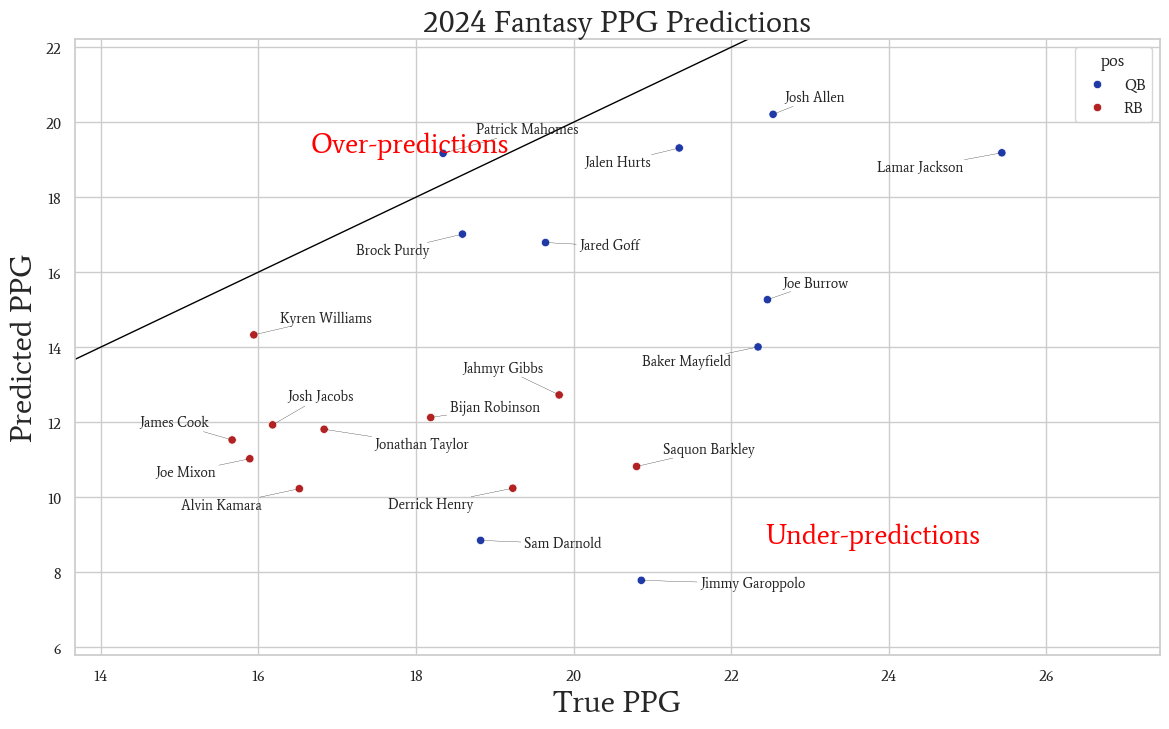

In [8]:
# plot 2024 predictions for top 12 QBs and top 30 RBs
qb_rb = pd.concat([qb_preds.head(10), rb_preds.head(10)], axis=0).reset_index(drop=True)
plot_2024_preds(qb_rb)

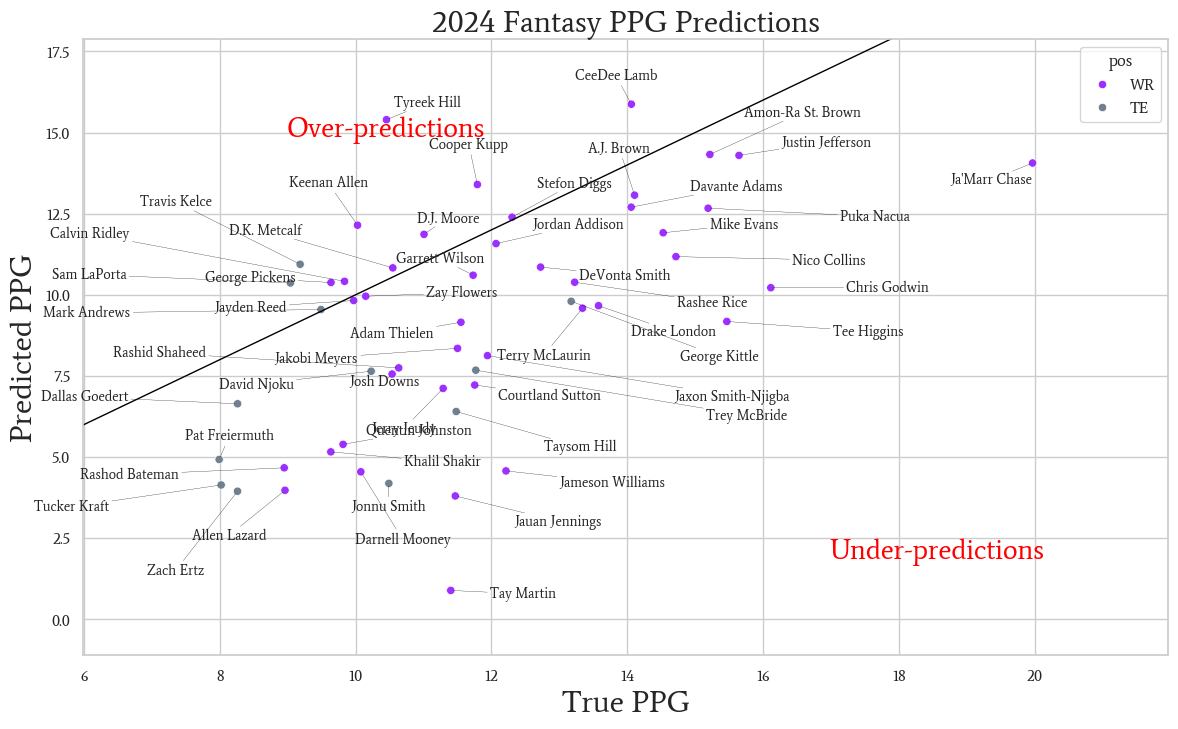

In [9]:
# get top 42 WRs and top 12 TEs
wr_preds = wr_te_preds.query('pos == "WR"').head(42)
te_preds = wr_te_preds.query('pos == "TE"').head(12)

# recombine and plot
wr_te = pd.concat([wr_preds, te_preds], axis=0).reset_index(drop=True)
plot_2024_preds(wr_te)

In [ ]:
# get X and y for the 3 subsets
X_qb, y_qb = get_X_y(qb)
X_rb, y_rb = get_X_y(rb)
X_wr_te, y_wr_te = get_X_y(wr_te)

# 2025 Predictions

In [ ]:
# fit models on entire subsets
xgb_qb.fit(X_qb, y_qb)
xgb_rb.fit(X_rb, y_rb)
xgb_wr_te.fit(X_wr_te, y_wr_te)

# make predictions on 2024 data
y_pred_2024 = xgb.predict(df_2024.drop(columns=non_feat_cols))

# create a df for our preds and sort
preds_2024_df = pd.DataFrame(data={'player': df_2024['player'].values, 'team': df_2024['team_name'].values, 'y_pred': y_pred_2024}).sort_values('y_pred', ascending=False).reset_index(drop=True)

# map colors
preds_2024_df['color'] = preds_2024_df['team'].map(TEAM_COLORS)

# get top 32
top_32 = preds_2024_df.head(32).copy()

# add rank
top_32['player_with_rank'] = [f'{name} ({i+1})' for i, name in enumerate(top_32['player'])]

# plot 2025 predictions
plot_2025_preds(top_32)

NameError: name 'X' is not defined

In [8]:
df_2024

,Player,Tm,Pos,Age,Key,Year,games_played_pct,games_started_pct,Exp,Pass_Cmp_per_game,Pass_Att_per_game,Pass_Yds_per_game,Pass_TD_per_game,Pass_Int_per_game,Rush_Att_per_game,Rush_Yds_per_game,Rush_TD_per_game,Rec_Tgt_per_game,Rec_Rec_per_game,Rec_Yds_per_game,Rec_TD_per_game,Fmb_per_game,FmbLost_per_game,Scrim_TD_per_game,Scrim_Yds_per_game,Touches_per_game,PPG_half-ppr,PPT_half-ppr,PPGOvrRank_half-ppr,PPGPosRank_half-ppr,PPTOvrRank_half-ppr,PPTPosRank_half-ppr,PPGTarget_half-ppr
13,Ameer Abdullah,LVR,RB,31,AbduAm00,2024,0.941176,0.187500,9,0.000000,0.000000,0.000000,0.000000,0.000000,4.125000,19.437500,0.125000,2.937500,2.500000,16.312500,0.187500,0.125000,0.062500,0.312500,35.750000,6.625000,6.575000,0.992453,186,47,325,17,NaN
34,De'Von Achane,MIA,RB,23,AchaDe00,2024,1.000000,0.941176,1,0.000000,0.000000,0.000000,0.000000,0.000000,11.941176,53.352941,0.352941,5.117647,4.588235,34.823529,0.352941,0.058824,0.000000,0.705882,88.176471,16.529412,15.347059,0.928470,39,11,335,23,NaN
58,Davante Adams,2TM,WR,32,AdamDa01,2024,0.823529,1.000000,10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.071429,6.071429,75.928571,0.571429,0.000000,0.000000,0.571429,75.928571,6.071429,14.057143,2.315294,59,12,83,61,NaN
106,Jordan Addison,MIN,WR,22,AddiJo00,2024,0.882353,1.000000,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,1.333333,0.066667,6.600000,4.200000,58.333333,0.600000,0.000000,0.000000,0.666667,59.666667,4.400000,12.066667,2.742424,80,21,29,23,NaN
114,Nate Adkins,DEN,TE,25,AdkiNa00,2024,1.000000,0.588235,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.882353,0.823529,6.764706,0.176471,0.000000,0.000000,0.176471,6.764706,0.823529,2.147059,2.607143,336,53,45,10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29202,Bryce Young,CAR,QB,23,YounBr01,2024,0.823529,0.857143,1,16.714286,27.428571,171.642857,1.071429,0.642857,3.071429,17.785714,0.428571,0.000000,0.000000,0.000000,0.000000,0.357143,0.142857,0.428571,17.785714,30.500000,14.572857,0.477799,46,28,464,27,NaN
29228,Dareke Young,SEA,WR,25,YounDa02,2024,0.823529,0.000000,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,541,214,541,214,NaN
29300,Olamide Zaccheaus,WAS,WR,27,ZaccOl01,2024,1.000000,0.352941,5,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.470588,0.000000,3.764706,2.647059,29.764706,0.176471,0.176471,0.058824,0.176471,30.235294,2.705882,5.288235,1.954348,229,90,150,109,NaN
29305,Bailey Zappe,CLE,QB,25,ZappBa00,2024,0.058824,1.000000,2,16.000000,31.000000,170.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,33.000000,9.000000,0.272727,140,51,515,59,NaN
